# Comandos Scilab

Nesta seção, são abordados alguns problemas associados a Sistemas de Controle. Considera-se a configuração padrão do sistema realimentado da Fig. 01.

![image.png](figura1.png)

## PROBLEMAS:

Seja o sistema de controle da Fig. 01 com as funções de transferência dadas a seguir e $G_d(s) = 0$:

$$G(s)=\frac{s^2 + s + 2}{s(s + 5)(s^2 + 2s + 1)}$$

$$H(s)=1$$

$$K(s)=\frac{20s + 0.01}{s}$$

- 1) Obter a função de transferência de malha-fechada resultante; 
- 2) Calcular uma representação no espaço de estados para a planta, O controlador e o sistema em malha-fechada; 
- 3) Analisar a estabilidade do sistema em malha-fechada utilizando a função de transferência e o modelo no espaço de estados. Encontrar o polinômio caracterı́stico do sistema resultante;
- 4) Obter os sinais de saı́da $y(t)$ e controle $u(t)$ do sistema em malha fechada para a entrada $r(t)$ o degrau unitário e o impulso unitário. Determinar o maior pico do sinal de saı́da e o tempo que a saı́da leva para atingir 98% do regime permanente, para $r(t) = 1$; 
- 5) Calcular a saı́da do sistema em malha-fechada para as entradas $r(t) = sen(πt)$ e $r(t)$ uma onda quadrada de amplitude unitária e perı́odo igual a quatro; 
- 6) Analisar a controlabilidade e a observabilidade da planta a ser controlada $(G(s))$ e obter a forma de Jordan associada à matriz dinâmica (planta);
- 7) Com $G_d(s) =\frac{1}{s^2 +s+1}$ , obter a resposta em frequência entre a saı́da y e a perturbaçaõ w ; 
- 8) O controlador $K(s)$ é substituı́do pelo controlador digital $K(z)$ com o segurador de ordem zero (ZOH), conforme a Fig. 02. Obter o modelo discreto para a planta e ZOH (visto pelo controlador) e, em seguida, calcular a função de transferência discreta de malha-fechada. Calcular a resposta ao degrau unitário e analisar a estabilidade do sistema resultante de malha-fechada. O perı́odo de amostragem é $T_s = 0.01s$ e $K(z) = \frac{0.473z − 0.4728}{z-1}$

![image.png](figura2.png)

### Problema 1

Obter a função de transferência de malha-fechada resultante.

Primeiro vamos determinar G(s):

In [5]:
s=poly(0,'s');
G = (s^2+s+2)/(s*(s+5)*(s^2+2*s+1));
G = syslin('c',G)



 G  = 

       2 +s +s²       
   -----------------  
   5s +11s² +7s³ +s⁴  



Agora o H(s):

In [6]:
H = syslin('c',[1],[1])

 H  = 

   1  
   -  
   1  



E por fim o K(s)

In [7]:
K = syslin('c',(20*s+0.01)/(s))

 K  = 

   0.01 +20s  
   ---------  
       s      



Vamos agora obter a função transferência equivalente em malha fechada $$\frac{GK}{1+GK}$$

In [8]:
MF = (G*K)/.(H)

 MF  = 

       0.02 +40.01s +20.01s² +20s³       
   ------------------------------------  
   0.02 +40.01s +25.01s² +31s³ +7s⁴ +s⁵  



Para obter o numerador e o denominador da função transferência de malha fechada:

In [9]:
num_mf = MF.num
den_mf = MF.den

 num_mf  = 

  0.02 +40.01s +20.01s² +20s³

 den_mf  = 

  0.02 +40.01s +25.01s² +31s³ +7s⁴ +s⁵



Para se obter os coeficientes:

In [10]:
num_mf = coeff(num_mf)
den_mf = coeff(den_mf)

 num_mf  = 

   0.02   40.01   20.01   20.

 den_mf  = 

   0.02   40.01   25.01   31.   7.   1.



Uma função útil para ver polos e zeros:

In [11]:
zpk(MF)

 ans  =

                           (s+0.0005) (s^2+1s+2)                      
   20 -------------------------------------------------------------- 
      (s+0.000500031) (s^2+6.41539s+25.6924) (s^2+0.584107s+1.55678) 




### Problema 2

Calcular uma representação no espaço de estados para a planta, O controlador e o sistema em malha-fechada

Para G(s):

In [12]:
ssG = tf2ss(G)

 ssG  = 


 ssG(1)  (state-space system:)

  "lss"  "A"  "B"  "C"  "D"  "X0"  "dt"

 ssG(2)= A matrix =

   0.0454545   0.5622417   2.776D-17  -2.776D-17
  -0.3809524  -5.526936   -1.580973    4.441D-16
  -0.2411616  -0.521717   -0.5185185  -1.4552138
   0.2305926   5.7967172   2.075027   -1.       

 ssG(3)= B matrix =

   0.
  -1.7514389
  -0.5744270
   0.7762059

 ssG(4)= C matrix =

  -1.0155048  -1.388D-17   0.   6.939D-18

 ssG(5)= D matrix =

   0.

 ssG(6)= X0 (initial state) =

   0.
   0.
   0.
   0.

 ssG(7)= Time domain =

  "c"



Para K(s):

In [13]:
ssK = tf2ss(K)

 ssK  = 


 ssK(1)  (state-space system:)

  "lss"  "A"  "B"  "C"  "D"  "X0"  "dt"

 ssK(2)= A matrix =

   0.

 ssK(3)= B matrix =

   0.1

 ssK(4)= C matrix =

   0.1

 ssK(5)= D matrix =

   20.

 ssK(6)= X0 (initial state) =

   0.

 ssK(7)= Time domain =

  "c"



H(s):

In [14]:
ssH = tf2ss(H)

 ssH  = 


 ssH(1)  (state-space system:)

  "lss"  "A"  "B"  "C"  "D"  "X0"  "dt"

 ssH(2)= A matrix =

    []

 ssH(3)= B matrix =

    []

 ssH(4)= C matrix =

    []

 ssH(5)= D matrix =

   1.

 ssH(6)= X0 (initial state) =

    []

 ssH(7)= Time domain =

  "c"



Para obter algum atributo do objeto, como por exemplo a matriz A, podemos fazer:

In [15]:
ssG(2)

 ans  =

   0.0454545   0.5622417   2.776D-17  -2.776D-17
  -0.3809524  -5.526936   -1.580973    4.441D-16
  -0.2411616  -0.521717   -0.5185185  -1.4552138
   0.2305926   5.7967172   2.075027   -1.       



Vamos agora obter a representação em espaço de estados em malha fechada:

In [16]:
ssMF = (ssG*ssK)/.(ssH)

 ssMF  = 


 ssMF(1)  (state-space system:)

  "lss"  "A"  "B"  "C"  "D"  "X0"  "dt"

 ssMF(2)= A matrix =

   0.0454545   0.5622417   2.776D-17  -2.776D-17   0.       
  -35.952844  -5.526936   -1.580973    6.872D-16  -0.1751439
  -11.907828  -0.521717   -0.5185185  -1.4552138  -0.0574427
   15.995408   5.7967172   2.075027   -1.          0.0776206
   0.1015505   1.388D-18   0.         -6.939D-19   0.       

 ssMF(3)= B matrix =

   0.
  -35.028777
  -11.488539
   15.524117
   0.1

 ssMF(4)= C matrix =

  -1.0155048  -1.388D-17   0.   6.939D-18   0.

 ssMF(5)= D matrix =

   0.

 ssMF(6)= X0 (initial state) =

   0.
   0.
   0.
   0.
   0.

 ssMF(7)= Time domain =

  "c"



E para encontrar os pólos e zeros (e já obter a função transferência):

In [17]:
zpk(ssMF)

 ans  =

                           (s+0.0005) (s^2+1s+2)                      
   20 -------------------------------------------------------------- 
      (s+0.000500031) (s^2+6.41539s+25.6924) (s^2+0.584107s+1.55678) 




Para só ir para função transferência:

In [18]:
ss2tf(ssMF)

 ans  =

   0.02 +40.01s +20.01s² +20s³ +8.118D-15s⁴  
   ----------------------------------------  
     0.02 +40.01s +25.01s² +31s³ +7s⁴ +s⁵    



Para dar uma limpada em coeficientes pequenos:

In [19]:
clean(ss2tf(ssMF))

 ans  =

            40.000002 +19.999999s +20s²            
   ----------------------------------------------  
   39.997506 +24.994502s +30.9965s² +6.9995s³ +s⁴  



### Problema 3

Analisar a estabilidade do sistema em malha-fechada utilizando a função de transferência e o modelo no espaço de estados. Encontrar o polinômio caracterı́stico do sistema resultante;

#### Análise sem Lyapunov

Para isso, iremos olhar as raízes do denominador e ver que todos estão no semiplano esquerdo.

In [20]:
roots(MF.den)

 ans  =

  -3.2076964 + 3.9246816i
  -3.2076964 - 3.9246816i
  -0.2920536 + 1.213048i 
  -0.2920536 - 1.213048i 
  -0.0005    + 0.i       



Para olhar os autovalores

In [21]:
Amf=ssMF(2);
spec(Amf)


 ans  =

  -3.2076964 + 3.9246816i
  -3.2076964 - 3.9246816i
  -0.2920536 + 1.213048i 
  -0.2920536 - 1.213048i 
  -0.0005    + 0.i       



Esta função, pode retornar autovalores e autovetores.

In [22]:
[p,v]=spec(Amf)

 p  = 

         column 1 to 3

   0.0626227 + 0.0185883i   0.0626227 - 0.0185883i   0.0336133 - 0.0117489i
  -0.4920916 + 0.3295801i  -0.4920916 - 0.3295801i   0.0051708 + 0.0795742i
   0.1160037 + 0.3155248i   0.1160037 - 0.3155248i  -0.7202913 + 0.i       
   0.729343  + 0.i          0.729343  + 0.i         -0.1647514 + 0.6681334i
  -0.0005056 - 0.0012071i  -0.0005056 + 0.0012071i  -0.00157   - 0.0024359i

         column 4 to 5

   0.0336133 + 0.0117489i  -0.0049239 + 0.i
   0.0051708 - 0.0795742i   0.0004025 + 0.i
  -0.7202913 + 0.i         -0.0002134 + 0.i
  -0.1647514 - 0.6681334i   0.0007502 + 0.i
  -0.00157   + 0.0024359i   0.9999875 + 0.i
 v  = 

         column 1 to 3

  -3.2076964 + 3.9246816i   0.        + 0.i          0.        + 0.i      
   0.        + 0.i         -3.2076964 - 3.9246816i   0.        + 0.i      
   0.        + 0.i          0.        + 0.i         -0.2920536 + 1.213048i
   0.        + 0.i          0.        + 0.i          0.        + 0.i      
   0.      

Podemos gerar também uma matriz de forma aleatória, e usar com a eig:

In [23]:
J=rand(3,3)
[p2,v2]=spec(J)

 J  = 

   0.2113249   0.3303271   0.8497452
   0.7560439   0.6653811   0.685731 
   0.0002211   0.6283918   0.8782165

 p2  = 

  -0.1883121 + 0.4974572i  -0.1883121 - 0.4974572i   0.4654016 + 0.i
   0.699273  + 0.i          0.699273  + 0.i          0.7013981 + 0.i
  -0.4402642 - 0.1850934i  -0.4402642 + 0.1850934i   0.5398538 + 0.i
 v2  = 

   0.0300427 + 0.3563346i   0.        + 0.i          0.        + 0.i
   0.        + 0.i          0.0300427 - 0.3563346i   0.        + 0.i
   0.        + 0.i          0.        + 0.i          1.6948371 + 0.i



Para encontrar o polinômio característico:

In [24]:
polinomio = poly(Amf,'x')

 polinomio  = 

  0.02 +40.01x +25.01x² +31x³ +7x⁴ +x⁵



Para encontrar os polos e zeros, diretamente da função transferência:

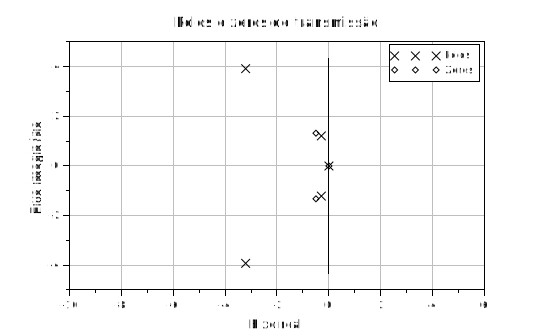

In [25]:
plzr(MF) // Também pode ser feito usando ssMF

In [26]:
poles = roots(MF.den)
zero = roots(MF.num)

 poles  = 

  -3.2076964 + 3.9246816i
  -3.2076964 - 3.9246816i
  -0.2920536 + 1.213048i 
  -0.2920536 - 1.213048i 
  -0.0005    + 0.i       

 zero  = 

  -0.5    + 1.3228757i
  -0.5    - 1.3228757i
  -0.0005 + 0.i       



Para verificar estabilidade da função transferência:

In [27]:
r = routh_t(polinomio)

(sign(prod(sign(r(:,1))+1))+1)/2

 r  = 

   1.          31.         40.01
   7.          25.01       0.02 
   27.427143   40.007143   0.   
   14.799312   0.02        0.   
   39.970077   0.          0.   
   0.02        0.          0.   


 ans  =

   1.



Para ver o mapa de pólos e zeros:

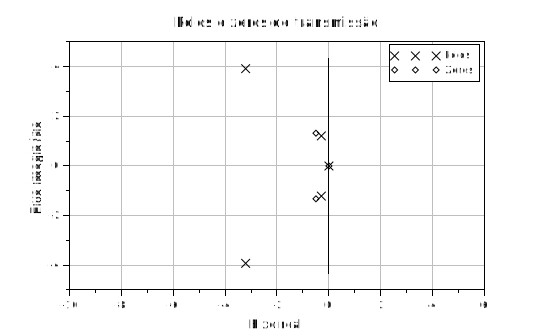

In [28]:
plzr(MF) // Funciona com um objeto ss, tf ou zpk

#### Análise com Lyapunov

Para ver o que a função faz:help lyap

In [29]:
help lyap

Iremos usar a primeira opção do comando acima, para isso, definiremos uma matriz Q diagonal positiva qualquer e obteremos os autovetores e autovalores da matriz W, solução da equação de Lyapunov

In [30]:
Q = eye(5,5);
W = lyap(Amf',Q,'c')
[V,D]=spec(Amf)


 W  = 

  -0.3210496   0.9152526   1.6772016   0.6453113   4.9236596
   0.9152526  -5.3566783  -2.3658567  -6.0767065  -0.3400672
   1.6772016  -2.3658567  -28.625059  -3.0238      0.093621 
   0.6453113  -6.0767065  -3.0238     -31.723878  -0.5988153
   4.9236596  -0.3400672   0.093621   -0.5988153  -1000.2924

 V  = 

         column 1 to 3

   0.0626227 + 0.0185883i   0.0626227 - 0.0185883i   0.0336133 - 0.0117489i
  -0.4920916 + 0.3295801i  -0.4920916 - 0.3295801i   0.0051708 + 0.0795742i
   0.1160037 + 0.3155248i   0.1160037 - 0.3155248i  -0.7202913 + 0.i       
   0.729343  + 0.i          0.729343  + 0.i         -0.1647514 + 0.6681334i
  -0.0005056 - 0.0012071i  -0.0005056 + 0.0012071i  -0.00157   - 0.0024359i

         column 4 to 5

   0.0336133 + 0.0117489i  -0.0049239 + 0.i
   0.0051708 - 0.0795742i   0.0004025 + 0.i
  -0.7202913 + 0.i         -0.0002134 + 0.i
  -0.1647514 - 0.6681334i   0.0007502 + 0.i
  -0.00157   + 0.0024359i   0.9999875 + 0.i
 D  = 

         column 1 to

Para obter a diagonal em um vetor da matriz diagonal:

In [31]:
diag(D) // A função também cria uma matriz diagonal

 ans  =

  -3.2076964 + 3.9246816i
  -3.2076964 - 3.9246816i
  -0.2920536 + 1.213048i 
  -0.2920536 - 1.213048i 
  -0.0005    + 0.i       



E para obter o determinante da matriz:

In [32]:
det(W)

 ans  =

  -276533.11



### Problema 4

Obter os sinais de saı́da y(t) e controle u(t) do sistema em malha fechada para a entrada r(t) o degrau unitário e o impulso unitário. Determinar o maior pico do sinal de saı́da e o tempo que a saı́da leva para atingir 98% do regime permanente, para r(t) = 1.

Podemos usar a função `csim`:

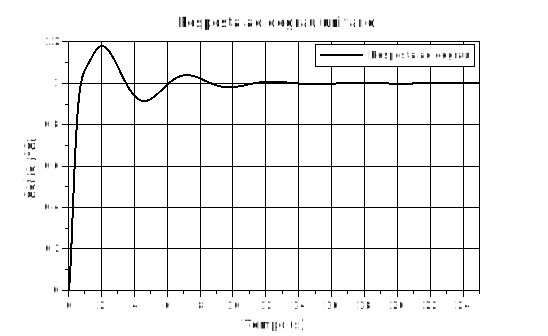

In [33]:
t = 0:0.05:25;
y = csim('step',t,MF);
plot(t,y,'k-','LineWidth',2); xgrid;
title('Resposta ao degrau unitário');
xlabel('Tempo (s)'); ylabel('Saída (°C)'); legend('Resposta ao degrau');

Para obter o valor máximo da saída:

In [34]:
tempMax = max(y)

 tempMax  = 

   1.1806502



E para obter o tempo em que isso ocorre:

In [35]:
[vv,pp] = max(y);
tempo98 = t(pp)


 tempo98  = 

   2.0500000



Para obter o U(s):

In [36]:
U = K/(1+G*K)

 U  = 

   0.05s +100.11s² +220.07s³ +140.01s⁴ +20s⁵  
   -----------------------------------------  
     0.02 +40.01s +25.01s² +31s³ +7s⁴ +s⁵     



Agora, vamos plotar o gráfico:

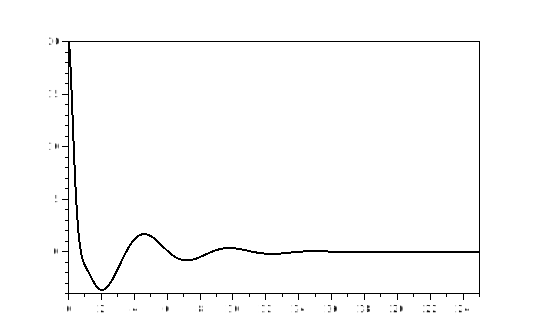

In [37]:
plot(t,csim('step',t,U),'k-','LineWidth',2);

E a resposta ao pulso:

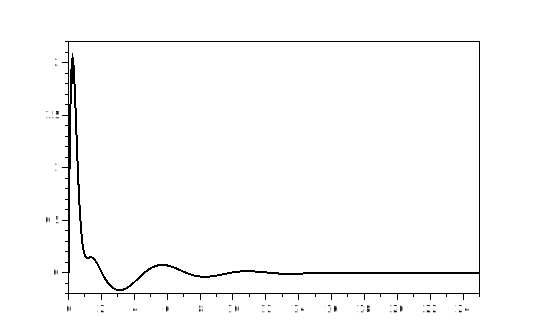

In [38]:
plot(t,csim('impulse',t,MF),'k-','LineWidth',2);

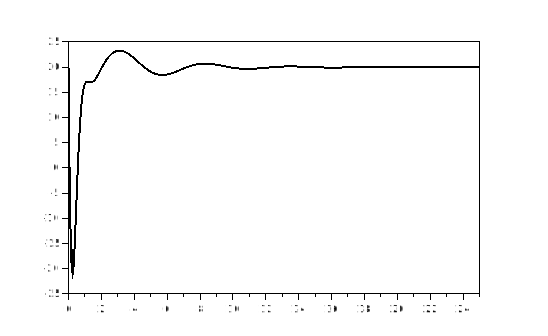

In [39]:
plot(t,csim('impulse',t,U),'k-','LineWidth',2);

### Problema 5

Calcular a saı́da do sistema em malha-fechada para as entradas r(t) = sen(πt) e r(t) uma onda quadrada de amplitude unitária e perı́odo igual a quatro; 

Podemos usar o `csim`, para seno:

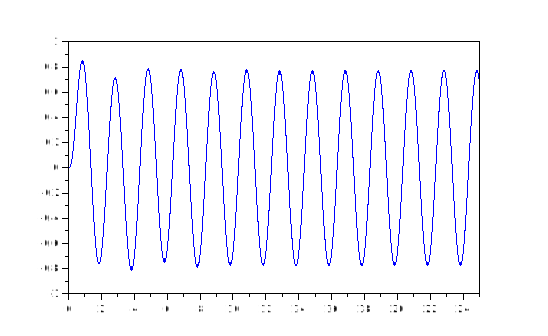

In [40]:
r=sin(%pi*t);
y=csim(r,t,MF);
plot(t,y);

Para onda quadrada:

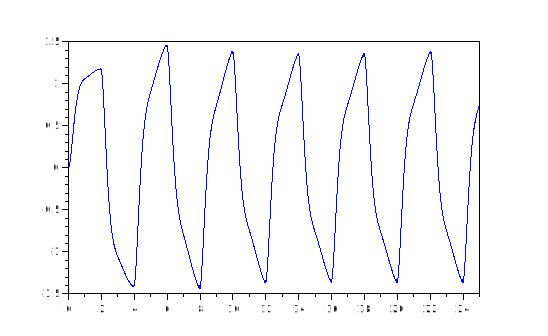

In [41]:
r=squarewave(2*%pi*t/4,50);
y=csim(r,t,MF);
plot(t,y);

### Problema 6

Analisar a controlabilidade e a observabilidade da planta a ser controlada (G(s)) e obter a forma de Jordan associada à matriz dinâmica (planta);

Função `contr`:

In [42]:
n = contr(ssG(2), ssG(3)) // Para obter o rank

// Para obter a matriz de controlabilidade
cont_mat(ssG(2), ssG(3))
cont_mat(ssG)

 n  = 

   4.



 ans  =

   0.         -0.9847319   5.9083916  -32.496154
  -1.7514389   10.588244  -58.275148   300.37177
  -0.574427    0.082061    12.309149  -84.276641
   0.7762059  -12.120753   73.441016  -384.34132

 ans  =

   0.         -0.9847319   5.9083916  -32.496154
  -1.7514389   10.588244  -58.275148   300.37177
  -0.574427    0.082061    12.309149  -84.276641
   0.7762059  -12.120753   73.441016  -384.34132



Função `obsv_mat`:

In [43]:
O = obsv_mat(ssG)
O = obsv_mat(ssG(2), ssG(4))
rank(O)

 O  = 

  -1.0155048  -1.388D-17   0.          6.939D-18
  -0.0461593  -0.5709591   8.153D-18   2.125D-17
   0.2154101   3.1297019   0.9026709  -2.854D-16
  -1.4001657  -17.647488  -5.4160256  -1.3135792

 O  = 

  -1.0155048  -1.388D-17   0.          6.939D-18
  -0.0461593  -0.5709591   8.153D-18   2.125D-17
   0.2154101   3.1297019   0.9026709  -2.854D-16
  -1.4001657  -17.647488  -5.4160256  -1.3135792

 ans  =

   4.



### Problema 7

Com $G_d(s) =\frac{1}{s^2 +s+1}$ , obter a resposta em frequência entre a saı́da y e a perturbaçaõ w;

![figura1](figura1.png)

In [44]:
Gd = syslin('c',1/(s^2+s+1));
Gw = Gd/(1+H*G*K)


 Gw  = 

                     5s² +11s³ +7s⁴ +s⁵                    
   ------------------------------------------------------  
   0.02 +40.03s +65.04s² +96.02s³ +63.01s⁴ +39s⁵ +8s⁶ +s⁷  



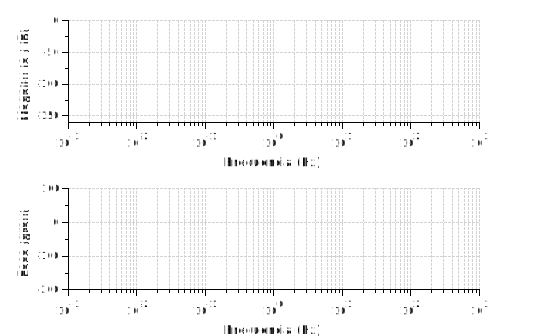

In [45]:
bode(Gw)

### Problema 8

O controlador K(s) é substituı́do pelo controlador digital $K(z)$ com o segurador de ordem zero (ZOH), conforme a Fig. 02. Obter o modelo discreto para a planta e ZOH (visto pelo controlador) e, em seguida, calcular a função de transferência discreta de malha-fechada. Calcular a resposta ao degrau unitário e analisar a estabilidade do sistema resultante de malha-fechada. O perı́odo de amostragem é $T_s=0.01s$ e $K(z) = \frac{0.473z - 0.4728}{z-1}$

![figura2](figura2.png)

In [46]:
Ts=0.01;
Gdiscreto=ss2tf(dscr(G, Ts))

/*
Note to MATLAB user: Obviously, the dscr command in Scilab is not quite convenient to use compared to c2d in MATLAB. First, it does not accept data directly in transfer function form. Second, c2d allows you to select discretization method such as ZOH, FOH, TUSTIN, etc. dscr, on the other hand, simply uses ZOH method. In case you want the TUSTIN method, there is another Scilab command cls2dls, which uses the same syntax as dscr. See Scilab help for more detail. 
*/


 Gdiscreto  = 

      0.000048 +0.000049z     
   -------------------------  
   0.9417475 -1.9414757z +z²  





Calcular o Kd:

In [47]:
z = poly(0,'z');
Kd = syslin('d',(0.473*z -0.4728)/(z - 1))


 Kd  = 

   -0.4728 +0.473z  
   ---------------  
        -1 +z       



Agora fazemos a realimentação:

In [48]:
MFd = (Kd*Gdiscreto)/.1

 MFd  = 

     -0.0002271 -0.0000045z +0.0002318z²    
   ---------------------------------------  
   -0.9417475 +2.8832232z -2.9414757z² +z³  



Obter resposta ao degrau:

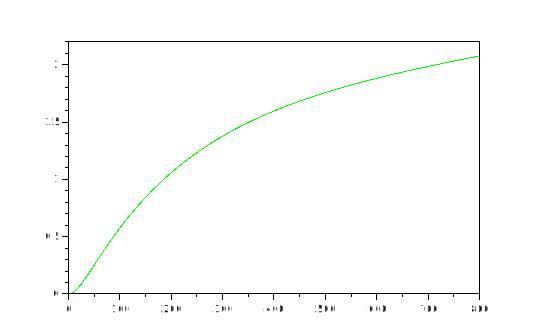

In [49]:
u=ones(1,800);
stprep=flts(u,tf2ss(MFd));   //Step response
plot(stprep,'g')

É estável?

In [50]:
ssMFd = tf2ss(MFd);

polinomio = poly(ssMFd.A,'x')

r = routh_t(polinomio)

sign(r(:,1))





 polinomio  = 

  -0.9417475 +2.8832232x -2.9414757x² +x³


 r  = 

   1.          2.8832232
  -2.9414757  -0.9417475
   2.5630616   0.       
  -0.9417475   0.       


 ans  =

   1.
  -1.
   1.
  -1.

